In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [40]:
from scipeds.data.completions import CompletionsQueryEngine
from scipeds.data.enums import NCSESFieldGroup, FieldTaxonomy, AwardLevel, RaceEthn, NCSES_HIERARCHY, NCSESSciGroup
from scipeds.data.queries import QueryFilters

In [41]:
db_path = Path('data/processed/scipeds_0_0_4.duckdb')
engine = CompletionsQueryEngine(db_path=db_path)

In [42]:
df = engine.field_totals_by_grouping(
    grouping='gender',
    taxonomy=FieldTaxonomy.ncses_field_group,
    query_filters=QueryFilters(award_levels=AwardLevel.bachelors),
    by_year=True,
    rel_rate=True
)
df = df.reset_index()
    

/Users/claireduvallet/github/sfa/scipeds/scipeds/data/queries.py:98: UserWarning: IPEDS award level coding and race and ethnicity coding changed between 2010 and 2011 datasets. For more details, see https://nces.ed.gov/ipeds/report-your-data/race-ethnicity-reporting-changes
  warnings.warn(


In [43]:
df.head()

,ncses_field_group,gender,year,field_degrees_within_gender,field_degrees_total,uni_degrees_within_gender,uni_degrees_total,field_pct,uni_pct,rel_rate,log2_rel_rate,fold_rel_rate,bounded_rel_rate
0,Architecture and Environmental Design,men,1984,5908,9204,486750,986345,0.641895,0.493489,1.300729,0.379320,0.300729,0.231200
1,Architecture and Environmental Design,men,1985,6032,9342,486660,990877,0.645686,0.491141,1.314666,0.394697,0.314666,0.239351
2,Architecture and Environmental Design,men,1986,5842,9145,490143,1000204,0.638819,0.490043,1.303598,0.382499,0.303598,0.232892
3,Architecture and Environmental Design,men,1987,5633,8982,485823,1005021,0.627143,0.483396,1.297370,0.375590,0.297370,0.229210
4,Architecture and Environmental Design,men,1988,5302,8654,483580,1009223,0.612665,0.479161,1.278620,0.354588,0.278620,0.217907


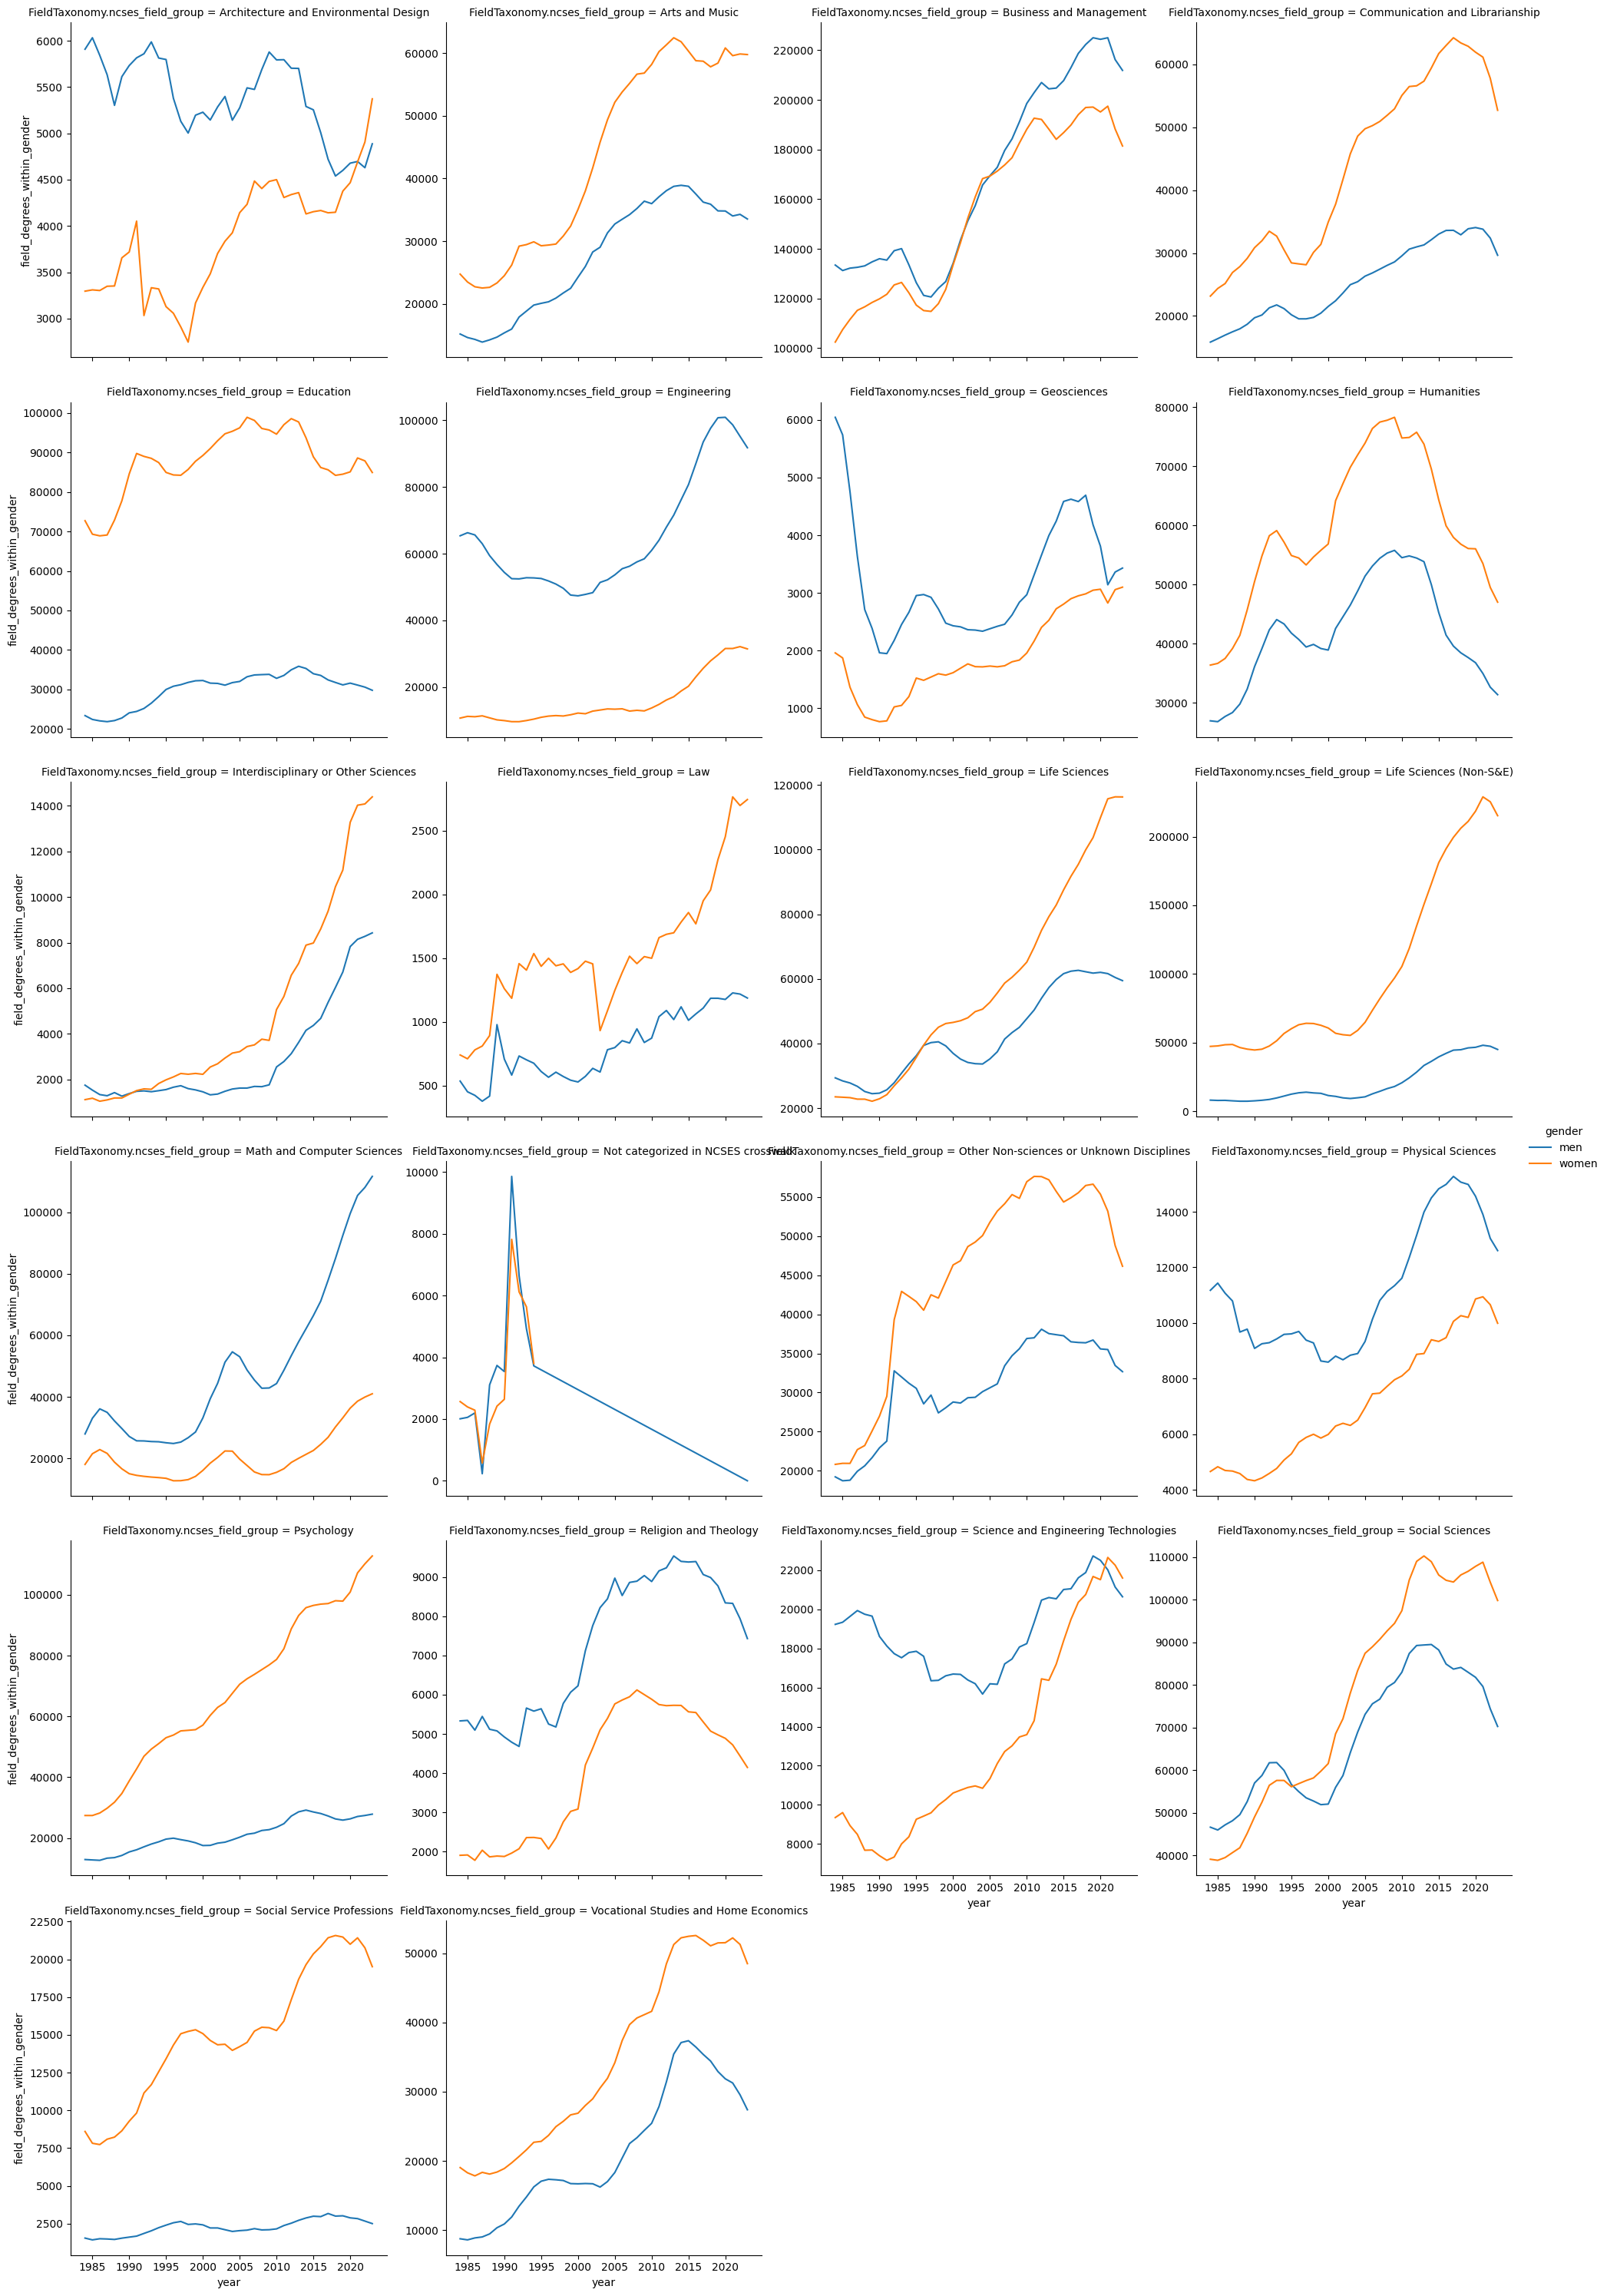

In [44]:
sns.relplot(
    data=df,
    kind="line",
    col=FieldTaxonomy.ncses_field_group,
    hue="gender",
    x="year",
    y="field_degrees_within_gender",
    col_wrap=4,
    facet_kws={"sharey": False}
)

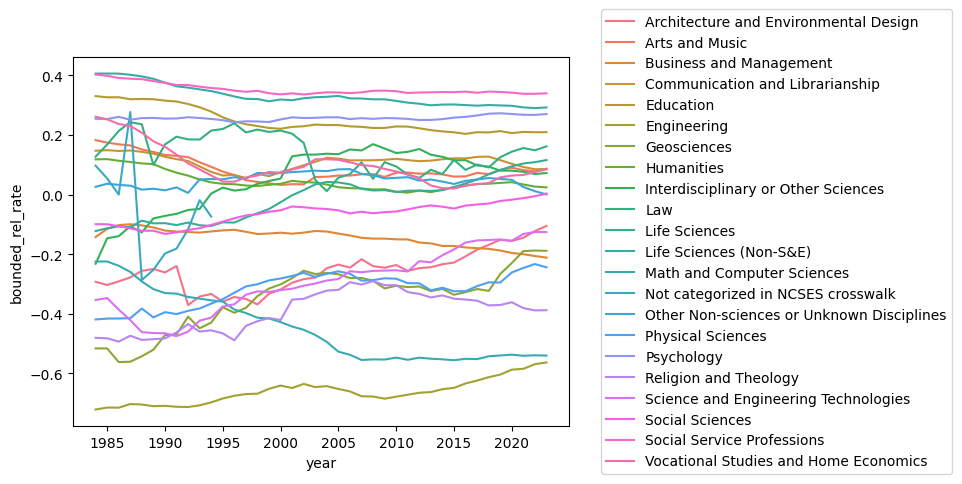

In [45]:
ax = sns.lineplot(
    data=df[df['gender'] == 'women'],
    x='year',
    y='bounded_rel_rate',
    hue=FieldTaxonomy.ncses_field_group,
)

ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


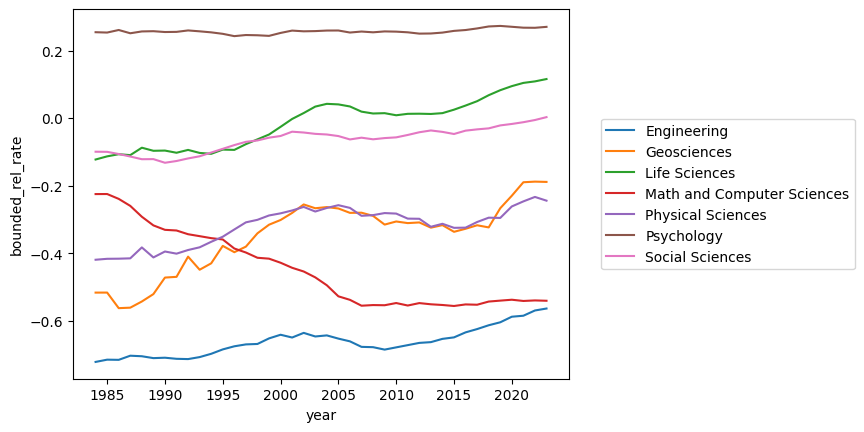

In [46]:
toplot = df[df[FieldTaxonomy.ncses_field_group].isin(NCSES_HIERARCHY[NCSESSciGroup.sci].keys())]
toplot = toplot[toplot['gender'] == 'women']
toplot[FieldTaxonomy.ncses_field_group] = toplot[FieldTaxonomy.ncses_field_group].astype(str)

ax = sns.lineplot(
    data=toplot,
    x='year',
    y='bounded_rel_rate',
    hue=FieldTaxonomy.ncses_field_group,
)

ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))